#  Decision Tree

<img src='dt1.png' height=400 width=400 attr="Regression line">
<img src='dt2.png' height=400 width=400 attr="Decision Tree">
<img src='dt3.png' height=600 width=600>

How can we come up with this order?

#### Decision Tree Orders are two types.
1. Entropy
2. Gini Impurity
<img src='dt4.png' height=600 width=600>
<img src='dt5.png' height=600 width=600>
By default, sklearn create Gini impurity tree

In [2]:
import pandas as pd


df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
target = df['salary_more_then_100k']

In [4]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
company_label=LabelEncoder() # Since our three variables are categorical
job_label=LabelEncoder()     # Creating three label encoder obbject
degree_label=LabelEncoder()

In [7]:
inputs['company_label'] = company_label.fit_transform(inputs['company'])  # Creating three new columns for labels
inputs['job_label'] = job_label.fit_transform(inputs['job'])           # fit-trnasform and store the values
inputs['degree_label'] = degree_label.fit_transform(inputs['degree'])
inputs      # Now our inputs dataframe look like

,company,job,degree,company_label,job_label,degree_label
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


Here,0 for abc pharma, 1 for facebook, 2 for google (company label)

0 for business manager, 1 for computer programmer, 2 for sales executive (job level)

0 for bachelors, 1 for masters (degree level)

In [8]:
inputs.drop(['company','job','degree'],axis='columns',inplace=True) # So, we can drop those three columns
inputs     # Now, our inputs dataframe

,company_label,job_label,degree_label
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [9]:
target.head() 

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split             # Train Test split
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.1)

In [11]:
len(X_train)

14

In [12]:
len(X_test)

2

### Decision Tree Model Building

In [13]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [14]:
model.fit(X_train,y_train)  # Gini criteria decision tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### Results

In [15]:
X_test

,company_label,job_label,degree_label
14,1,1,0
5,2,1,1


In [16]:
y_test

14    1
5     1
Name: salary_more_then_100k, dtype: int64

In [17]:
model.predict(X_test)

array([1, 0], dtype=int64)

In [18]:
# Is salary of Google, Computer Engineer, Bachelors degree > 100 k ? No
model.predict([[2,1,0]])

array([0], dtype=int64)

In [19]:
# Is salary of Google, Computer Engineer, Masters degree > 100 k ?  Yes
model.predict([[2,1,1]])

array([0], dtype=int64)

In [20]:
model.score(X_test,y_test)     # Accuracy   50%

0.5

#### Confusion Matrix

In [30]:
y_predicted = model.predict(X_test)  # Predicted values for my all test data

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)  # Truth Values & Predicted Values as parameter
cm

array([[0, 0],
       [1, 1]], dtype=int64)

Text(69.0, 0.5, 'Truth')

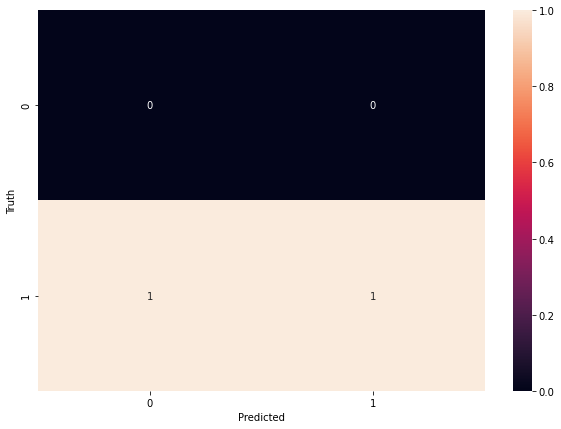

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)  # Using Heatmap
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Exercise
<img src="titanic.jpg" height=200 width=400/>

**Build decision tree model to predict survival based on certain parameters using titanic.csv**

In this file using following columns build a model to predict if person would survive or not,
1. Pclass
2. Sex
3. Age
4. Fare
#### Calculate score of model